## AIML Project - Part A

**Overview: Develop a Classification Model for determining mobile phone price range based on features available**

##### Objectives:
1. Cleaning Data and Feature Selection
2. Training and Evaluate Model
3. Save Model for Future Use

##### File Description:
1. phone_price_classification1.csv : The training set. Features of mobile phone with price range
2. phone_test.csv : The test set. For Forecasting using the model we are going to train using above train dataset



####    Data Field
Dataset as 21 features and 2000 entries. The meanings of the features are given below.

**battery_power:** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front  Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last when you are

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1752]:
import chart_studio
chart_studio.tools.set_credentials_file(username='onedayday', api_key='eg493yrJVmhqJpFx4jr4')

In [1753]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import chart_studio.plotly as py
import plotly.graph_objects as go
import missingno as msno
from joblib import Parallel, delayed
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sns.set()

In [1754]:
import warnings
warnings.filterwarnings('ignore')

### Data Extraction

In [1755]:
df = pd.read_csv('./phone_price_classification.csv')
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,0,No,Yes,medium cost
1,1021,1,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,1,Yes,No,high cost
2,563,1,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,Yes,No,high cost
3,615,1,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,No,No,high cost
4,1821,1,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,Yes,No,medium cost


In [1756]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 2000
Number of Columns: 21


### Data Exploration

In [1757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Check missing values in the dataset

In [1758]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

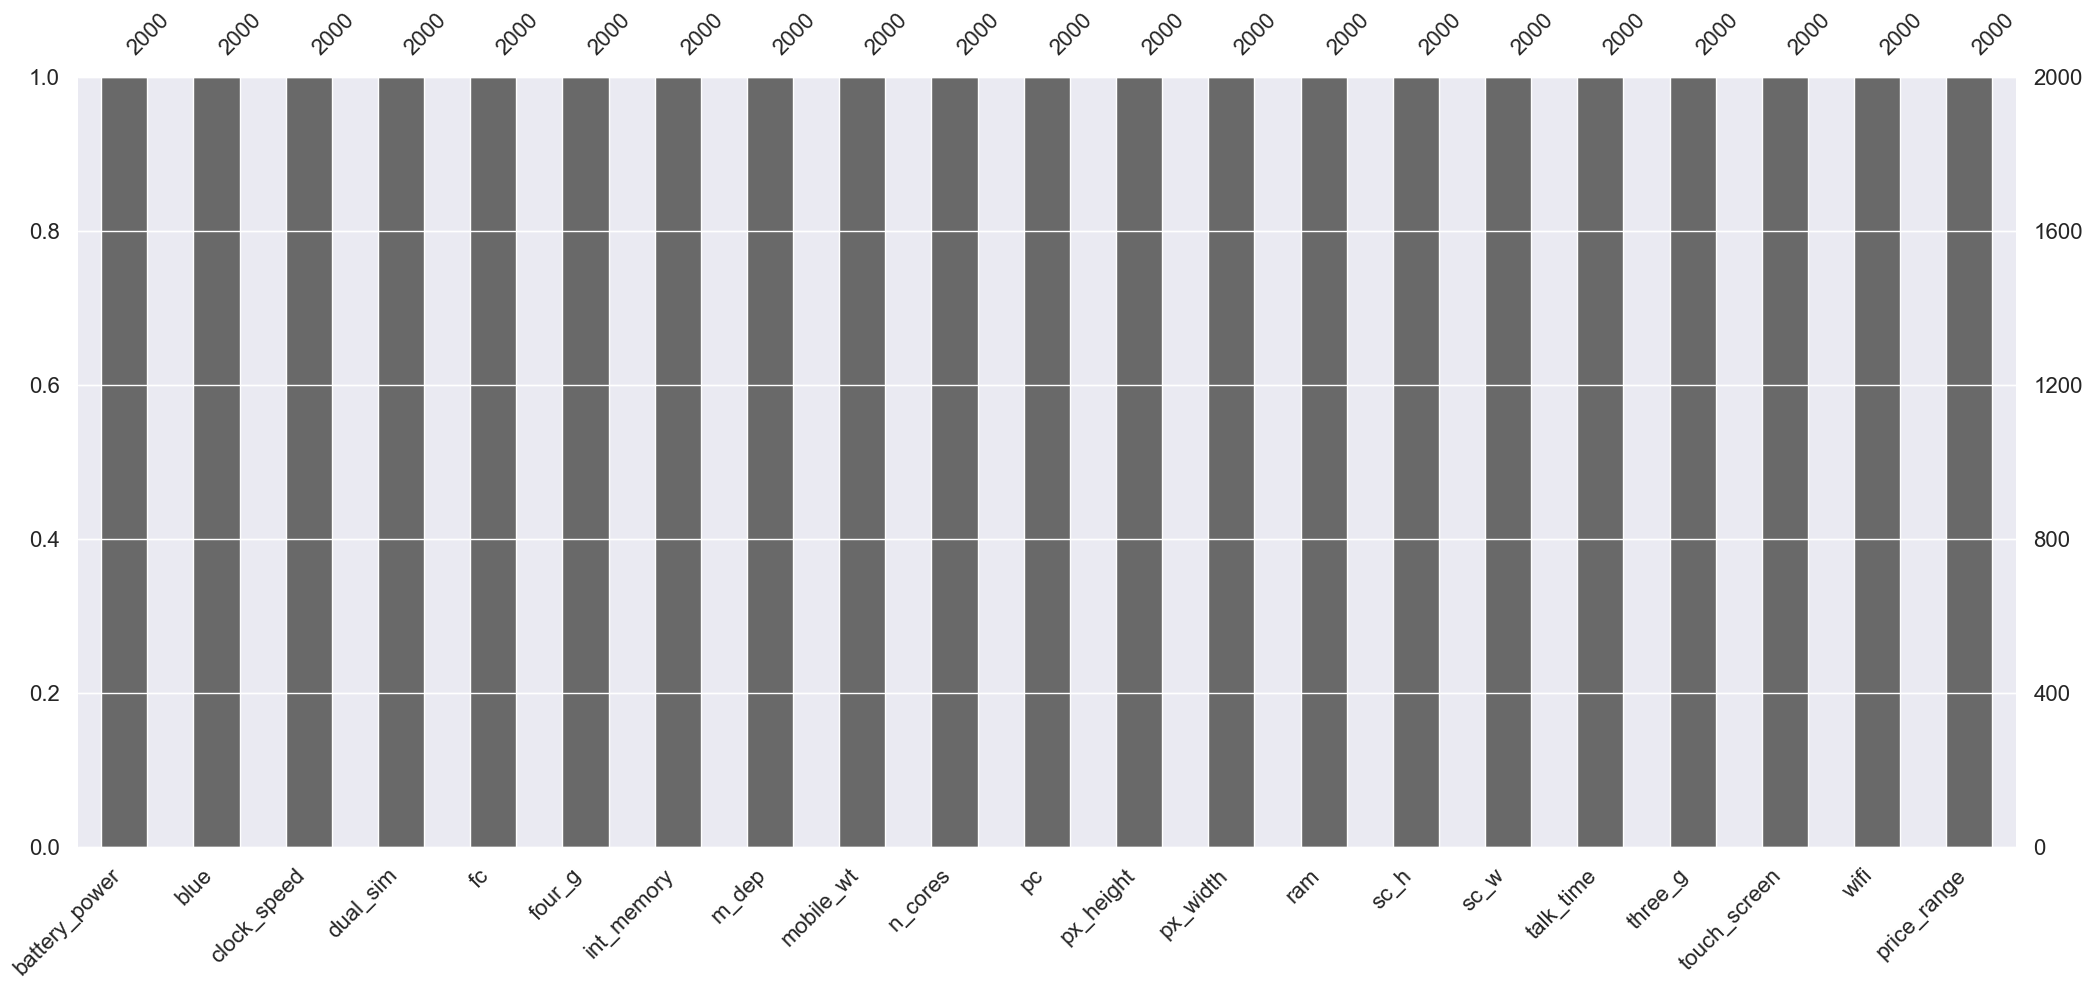

In [1759]:
msno.bar(df)
plt.show()

There's no missing values in the dataset

In [1760]:
df.shape

(2000, 21)

In [1761]:
df.describe()

,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500
std,439.418206,0.5001,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273
min,501.000000,0.0000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.0000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000
50%,1226.000000,0.0000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000
75%,1615.250000,1.0000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,1.0000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


In [1762]:
df.duplicated().sum()


0

In [1763]:
df.dual_sim.value_counts()

Yes    1019
No      981
Name: dual_sim, dtype: int64

In [1764]:
df.four_g.value_counts()

Yes    1043
No      957
Name: four_g, dtype: int64

In [1765]:
df.touch_screen.value_counts()

Yes    1006
No      994
Name: touch_screen, dtype: int64

In [1766]:
df.wifi.value_counts()

Yes    1014
No      986
Name: wifi, dtype: int64

In [1767]:
df.price_range.value_counts()

medium cost       500
low cost          500
very high cost    500
high cost         500
Name: price_range, dtype: int64

In [1768]:
def check(feature,df):
    if feature == 'outliner':
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3-q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
        print()
        print('Upper Bound Value: {}'.format(upper_bound),'\n')
        print('Lower Bound Value: {}'.format(lower_bound),'\n')
        print('Number of Outliers: '+ str(len(outliers)),'\n')
        print('Max Outlier Value: '+ str(outliers.max()),'\n')
        print('Min Outlier Value: '+ str(outliers.min()),'\n')


In [1769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [1770]:
check('outliner', df)


Upper Bound Value: battery_power    2760.500
blue                2.500
clock_speed         4.450
fc                 16.000
int_memory         96.000
m_dep               1.700
mobile_wt         261.500
n_cores            13.000
pc                 30.000
px_height        1944.000
px_width         2770.375
ram              5850.000
sc_h               26.500
sc_w               19.500
talk_time          31.000
three_g             1.000
dtype: float64 

Lower Bound Value: battery_power    -293.500
blue               -1.500
clock_speed        -1.550
fc                 -8.000
int_memory        -32.000
m_dep              -0.700
mobile_wt          17.500
n_cores            -3.000
pc                -10.000
px_height        -714.000
px_width         -262.625
ram             -1578.000
sc_h               -1.500
sc_w               -8.500
talk_time          -9.000
three_g             1.000
dtype: float64 

Number of Outliers: 2000 

Max Outlier Value: battery_power       NaN
blue                NaN
c

In [1771]:
col_list = ['ram','px_height','px_width','battery_power']
#Outlier Removal 
for a in col_list: 
    q1 = df[a].quantile(0.25)
    q3 = df[a].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    df = df[(df[a] > 0) & (df[a] < upper)]

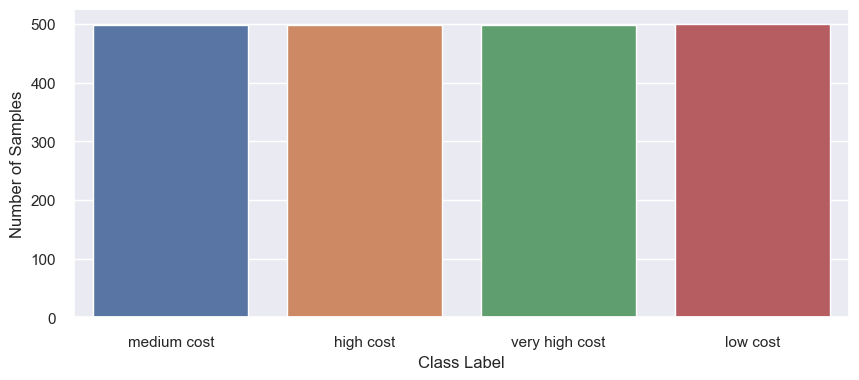

In [1772]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x ='price_range', data=df)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

### Data Transformation

In [1773]:
def label_encode_columns(df, columns):
  le = LabelEncoder()
  for column in columns:
    df[column] = le.fit_transform(df[column])
  return df
df = label_encode_columns(df, ["dual_sim", "four_g", "touch_screen", "wifi"])
#yes= 1, no=0

In [1774]:
df.price_range= df.price_range.replace(['low cost','medium cost','high cost','very high cost'],[1,2,3,4])
df.price_range.value_counts().sort_index()


1    500
2    499
3    499
4    498
Name: price_range, dtype: int64

In [1775]:
class_names = ['low cost','medium cost','high cost','very high cost']

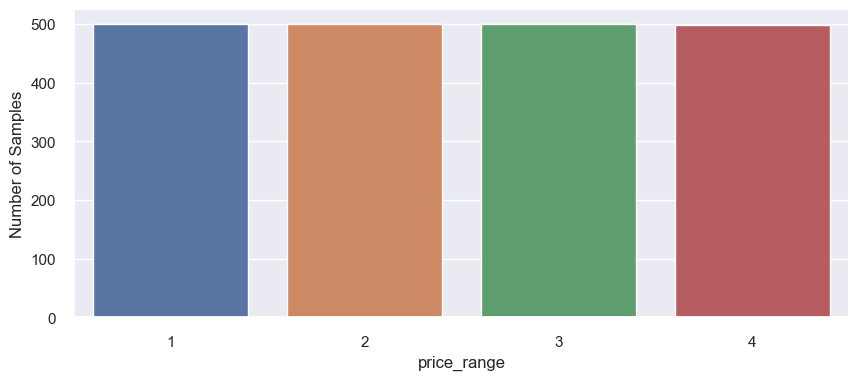

In [1776]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x ='price_range', data=df)
plt.xlabel("price_range")
plt.ylabel("Number of Samples")
plt.show()

<AxesSubplot:>

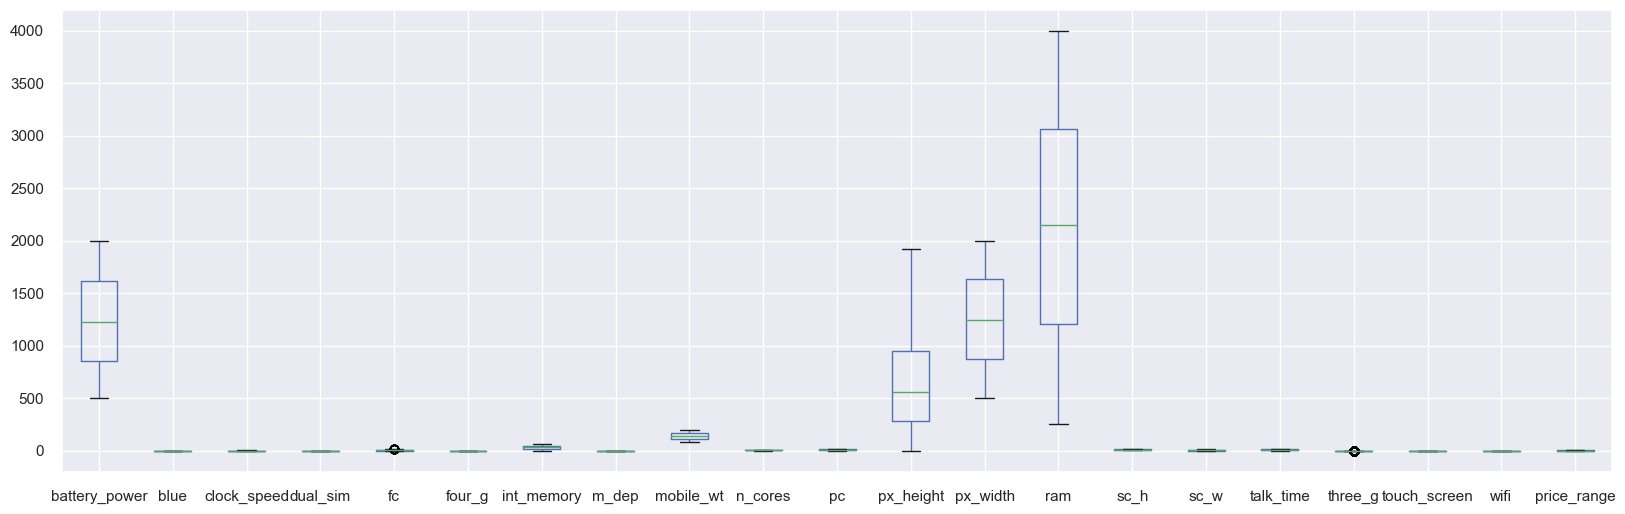

In [1777]:
df.plot(kind='box', figsize=(20,6))

In [1778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1996 non-null   int64  
 1   blue           1996 non-null   int64  
 2   clock_speed    1996 non-null   float64
 3   dual_sim       1996 non-null   int32  
 4   fc             1996 non-null   int64  
 5   four_g         1996 non-null   int32  
 6   int_memory     1996 non-null   int64  
 7   m_dep          1996 non-null   float64
 8   mobile_wt      1996 non-null   int64  
 9   n_cores        1996 non-null   int64  
 10  pc             1996 non-null   int64  
 11  px_height      1996 non-null   int64  
 12  px_width       1996 non-null   int64  
 13  ram            1996 non-null   int64  
 14  sc_h           1996 non-null   int64  
 15  sc_w           1996 non-null   int64  
 16  talk_time      1996 non-null   int64  
 17  three_g        1996 non-null   int64  
 18  touch_sc

### Feature Analysis

Finding correlation between features

In [1779]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.012144,0.011493,-0.041826,0.032835,0.015230,-0.005087,0.035285,0.002986,-0.029058,...,0.014856,-0.010143,-0.001855,-0.030825,-0.020728,0.051538,0.011265,-0.010612,-0.008250,0.199706
blue,0.012144,1.000000,0.022094,0.035300,0.004597,0.012488,0.041511,0.003024,-0.008457,0.034691,...,-0.009904,-0.042228,0.027029,-0.003488,-0.001521,0.013949,-0.030849,0.010076,-0.022895,0.020600
clock_speed,0.011493,0.022094,1.000000,0.000008,-0.000563,-0.043205,0.007292,-0.014243,0.012064,-0.006019,...,-0.011954,-0.008931,0.003493,-0.028183,-0.006678,-0.011141,-0.046514,0.018465,-0.023282,-0.006141
dual_sim,-0.041826,0.035300,0.000008,1.000000,-0.029473,0.004191,-0.016235,-0.022192,-0.009312,-0.023593,...,-0.022432,0.014901,0.041184,-0.012392,-0.016419,-0.039272,-0.013443,-0.015134,0.021769,0.017507
fc,0.032835,0.004597,-0.000563,-0.029473,1.000000,-0.016223,-0.029098,-0.000980,0.023618,-0.012526,...,-0.008230,-0.004926,0.014442,-0.010560,-0.010717,-0.006750,0.002003,-0.014548,0.020799,0.021815
four_g,0.015230,0.012488,-0.043205,0.004191,-0.016223,1.000000,0.008527,-0.001481,-0.015302,-0.031004,...,-0.020805,0.005319,0.006551,0.026563,0.036354,-0.047579,0.583891,0.015840,-0.017627,0.013510
int_memory,-0.005087,0.041511,0.007292,-0.016235,-0.029098,0.008527,1.000000,0.007310,-0.032969,-0.027606,...,0.007250,-0.010574,0.032351,0.035779,0.010592,-0.004268,-0.009484,-0.026526,0.005601,0.043183
m_dep,0.035285,0.003024,-0.014243,-0.022192,-0.000980,-0.001481,0.007310,1.000000,0.021012,-0.004263,...,0.024145,0.024663,-0.008115,-0.025333,-0.020134,0.017603,-0.011876,-0.002638,-0.029100,0.001951
mobile_wt,0.002986,-0.008457,0.012064,-0.009312,0.023618,-0.015302,-0.032969,0.021012,1.000000,-0.018892,...,0.003126,0.002769,-0.001500,-0.032448,-0.020229,0.007647,0.002290,-0.014111,0.000109,-0.028612
n_cores,-0.029058,0.034691,-0.006019,-0.023593,-0.012526,-0.031004,-0.027606,-0.004263,-0.018892,1.000000,...,-0.007898,0.024127,0.005326,-0.000189,0.024432,0.013259,-0.015477,0.022740,-0.009964,0.004516


Following heatmap shows the correlation values between features.

<AxesSubplot:>

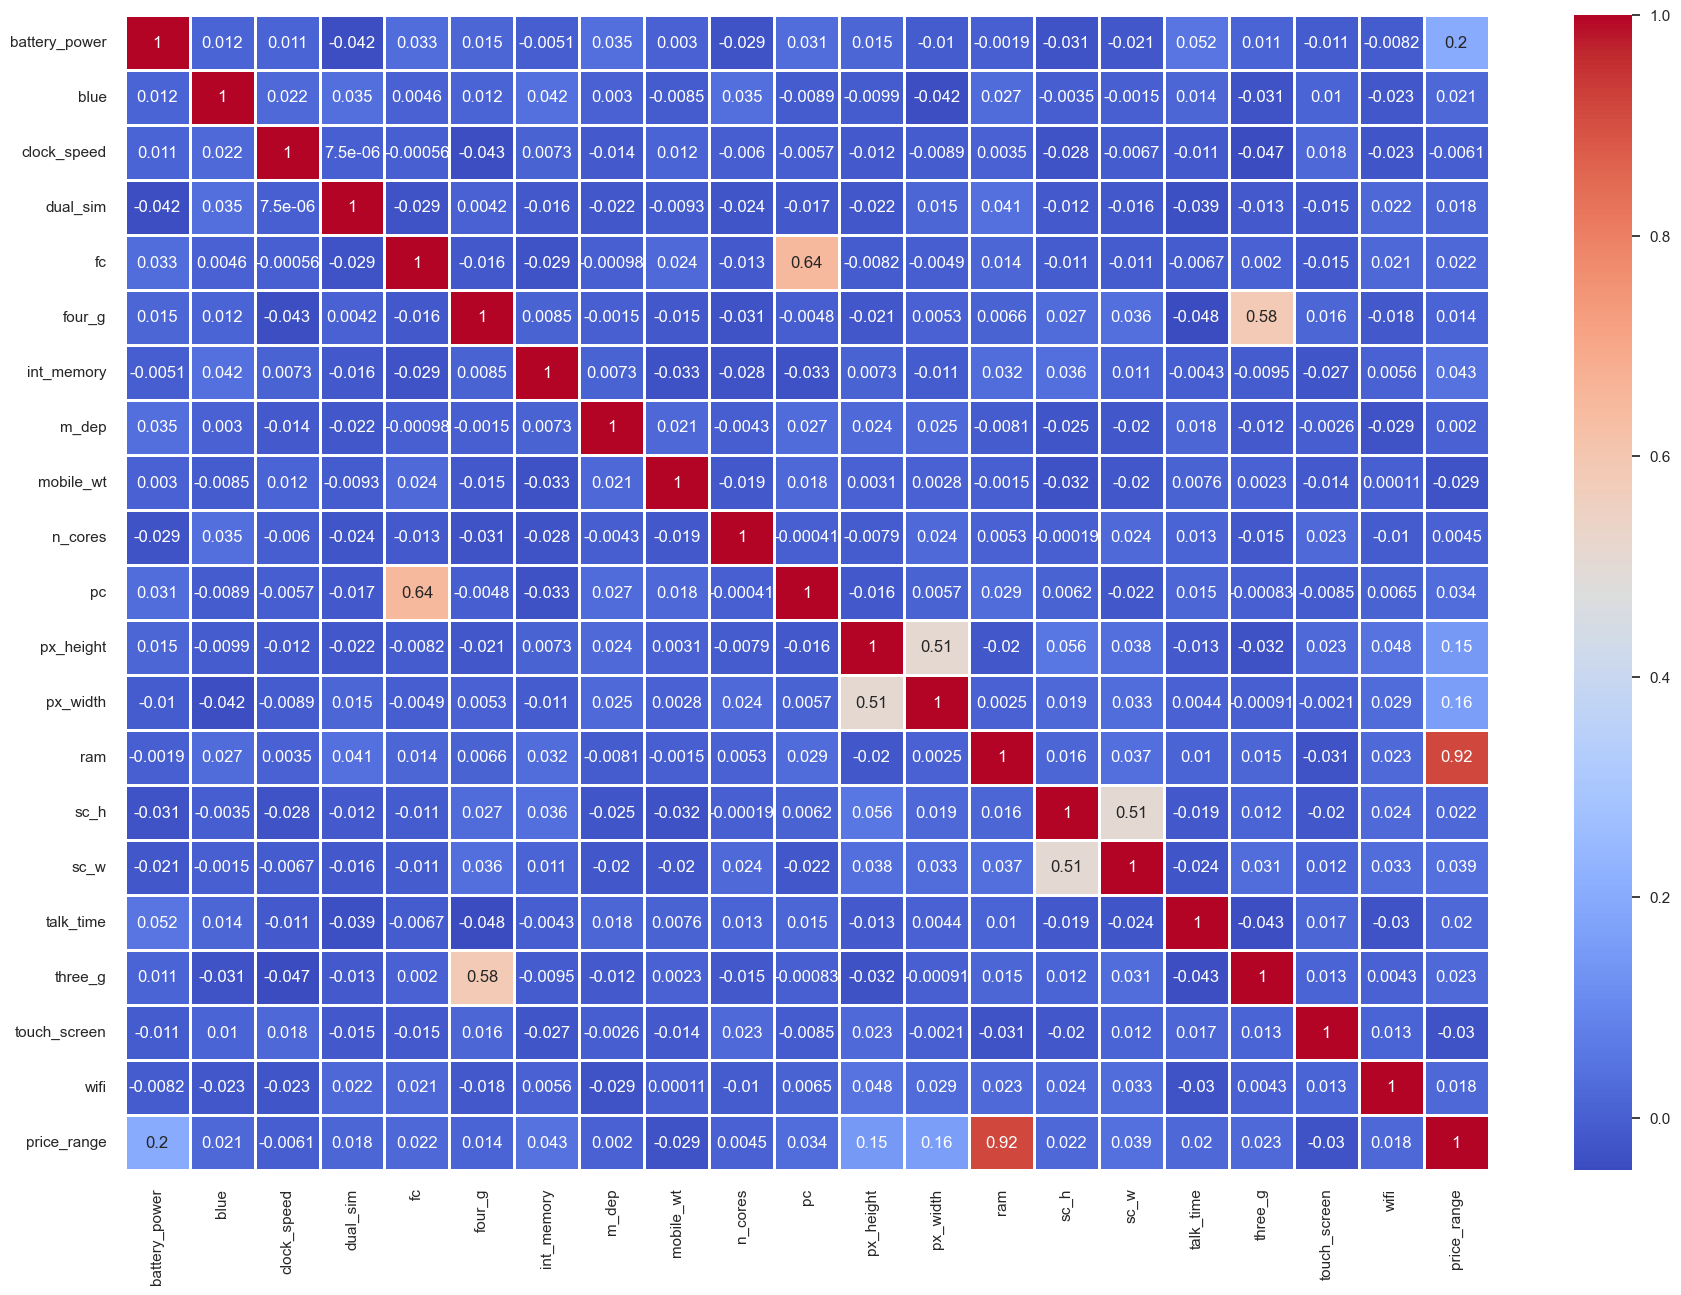

In [1780]:
plt.figure(figsize=(22, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

As we can see our target price range has highly positive correlation between ram. 


Now lets see correlation of price range with other features.

In [1781]:
corr=df.corr()
corr.sort_values(by=['price_range'],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917212
battery_power    0.199706
px_width         0.163547
px_height        0.147821
int_memory       0.043183
sc_w             0.038762
pc               0.034262
three_g          0.022889
fc               0.021815
sc_h             0.021590
blue             0.020600
talk_time        0.020421
wifi             0.018393
dual_sim         0.017507
four_g           0.013510
n_cores          0.004516
m_dep            0.001951
clock_speed     -0.006141
mobile_wt       -0.028612
touch_screen    -0.030465
Name: price_range, dtype: float64

price_range and ram have about 0.91 correlation. Because of that I compared ram and other features with price range with Seaborn and Plotly libraries. Also I plotted some graph to find out the relationship of other features with price_range.

I also compared every features with 'price_range' using individual correlation graphs to find out the correlation of different features with 'price_range'.

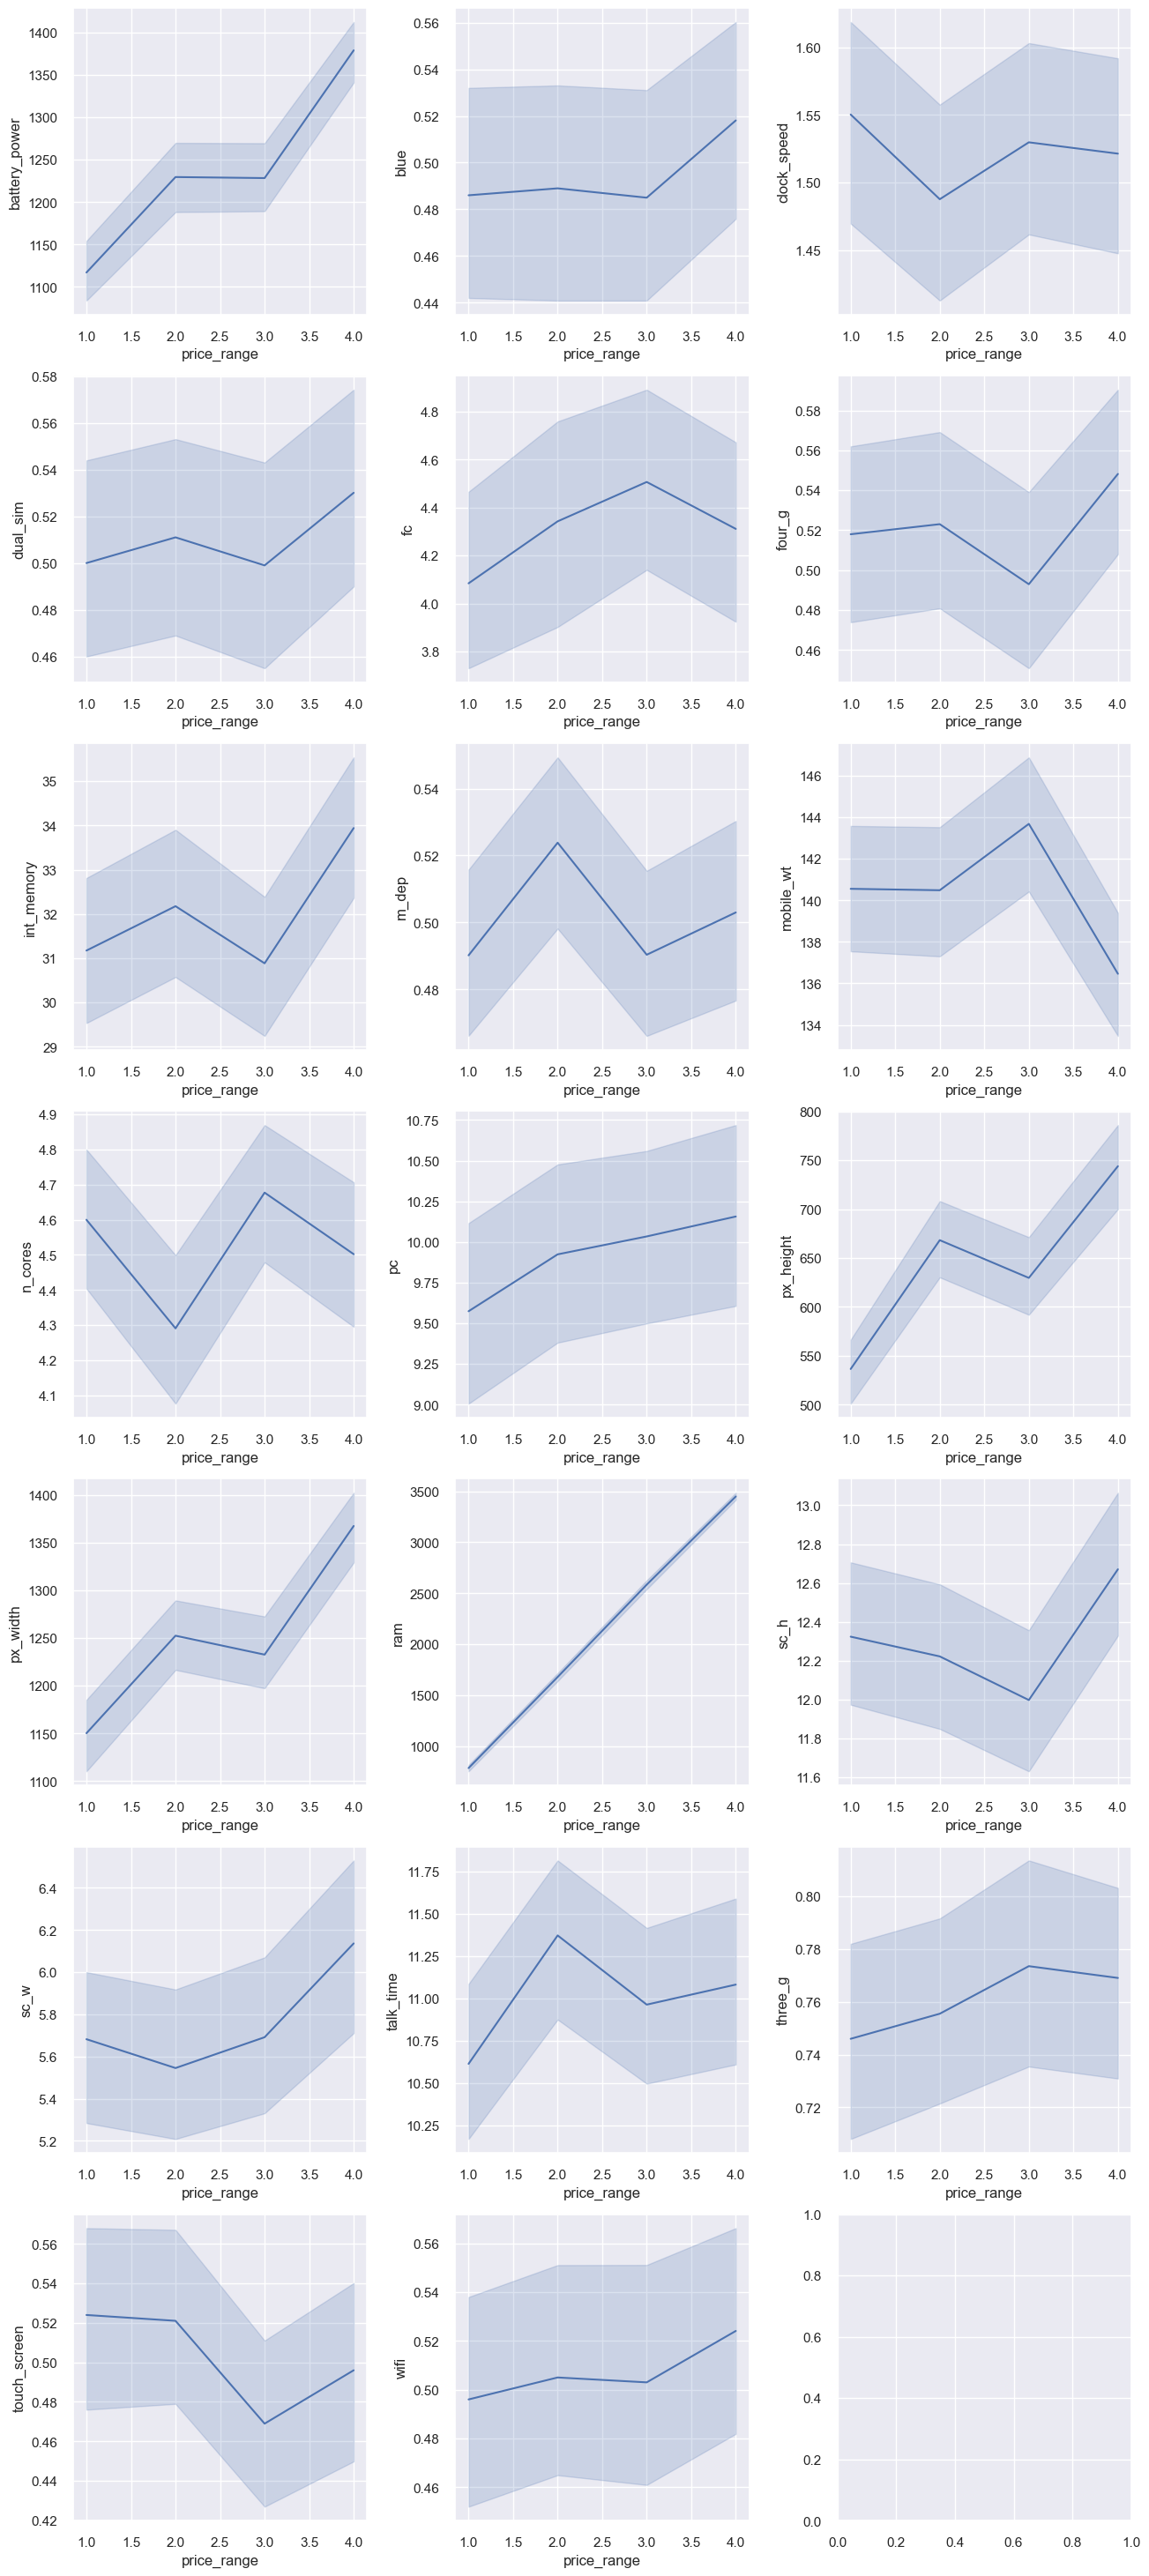

In [1782]:
# individual correlation graphs

# get all columns and remove price_range
cols = list(df.columns.values)
cols.remove('price_range')

# plot figure
fig, ax = plt.subplots(7, 3, figsize=(15, 30))
plt.subplots_adjust(left=0.1, bottom=0.05, top=1.0, wspace=0.3, hspace=0.2)
for i, col in zip(range(len(cols)), cols):
    ax = plt.subplot(7,3,i+1)
    sns.lineplot(ax=ax,x='price_range', y=col, data=df)

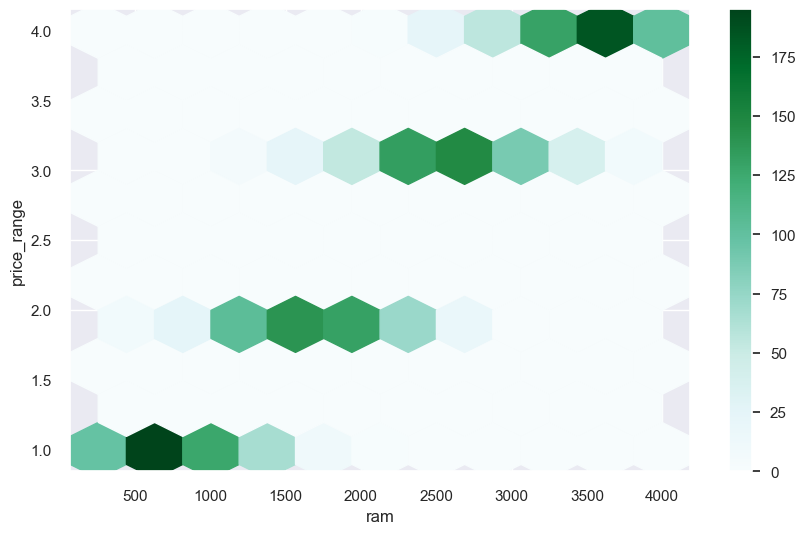

In [1783]:
df.plot(kind='hexbin', x = 'ram', y = 'price_range',gridsize=10, figsize=(10,6))

plt.show()

<AxesSubplot:title={'center':'ram'}, xlabel='price_range'>

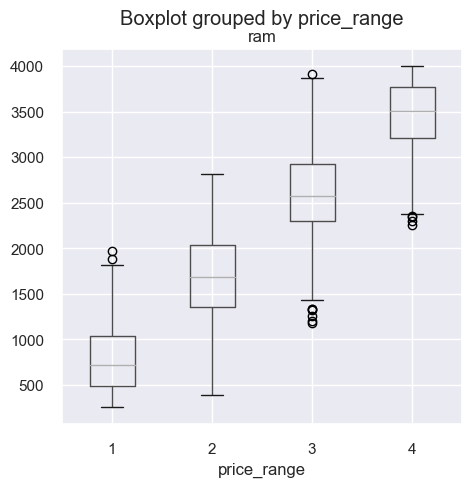

In [1784]:
df.boxplot(column='ram', by='price_range')

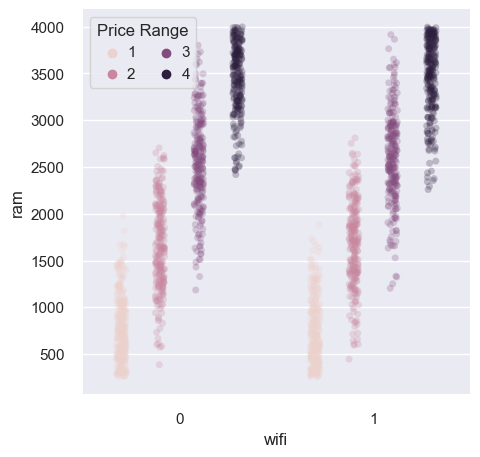

In [1785]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="wifi", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

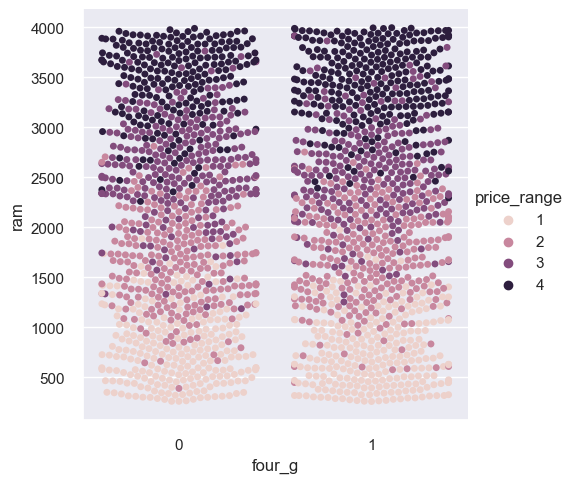

In [1786]:
sns.catplot(data=df, x="four_g", y="ram", hue="price_range", kind="swarm")

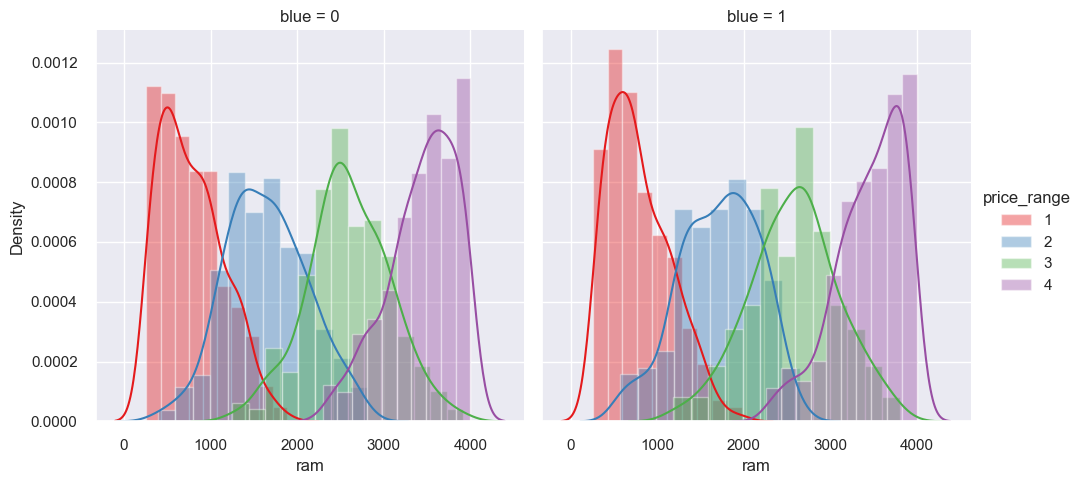

In [1787]:
g = sns.FacetGrid(df, col="blue", hue="price_range", palette="Set1",height=5)
g = (g.map(sns.distplot, "ram").add_legend())

Compare baterry_power with price_range. We can see that as the battery_power increased, price_range also increased which is positively correlated with our target 'price_range'.

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

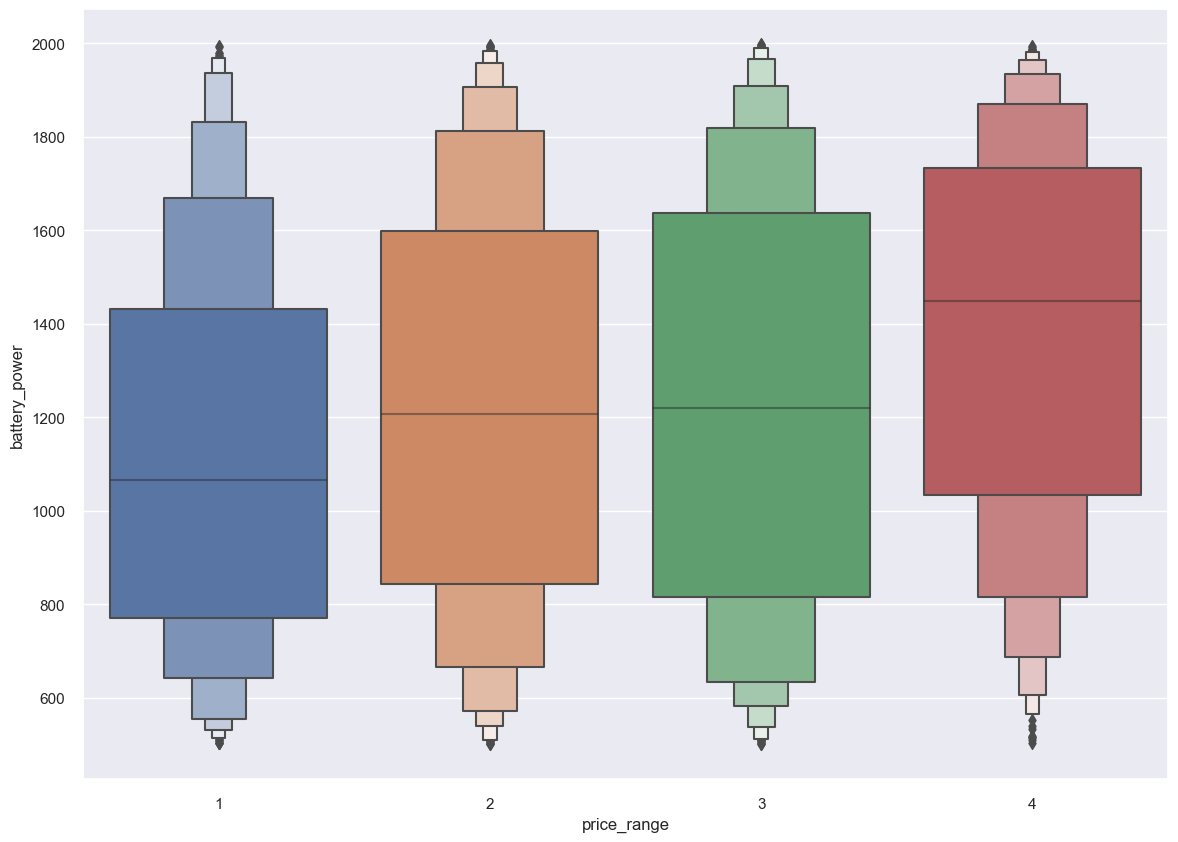

In [1788]:
fig, ax = plt.subplots(figsize=(14,10))
sns.boxenplot(x="price_range",y="battery_power", data=df,ax = ax)

In [1789]:
zero=df[df.price_range==1]
one=df[df.price_range==2]
two=df[df.price_range==3]
three=df[df.price_range==4]

trace0 = go.Box(
    y=zero.ram.values,
    x=zero.three_g.values,
    name='0',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = go.Box(
    y=one.ram.values,
    x=one.three_g.values,
    name='1',
    marker=dict(
        color='#FF4136'
    )
)
trace2 = go.Box(
    y=two.ram.values,
    x=two.three_g.values,
    name='2',
    marker=dict(
        color='#FF851B'
    )
)
trace3 = go.Box(
    y=three.ram.values,
    x=three.three_g.values,
    name='3',
    marker=dict(
        color='blue'
    )
)

data1 = [trace0, trace1, trace2,trace3]
layout = go.Layout(
    xaxis=dict(title="Three-g"),
    yaxis=dict(
        title="ram",
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data1, layout=layout)
fig.show()

### Data Splitting

In [1790]:
test= df.sample(frac=0.10, random_state=200)
clean= df[~df.index.isin(test.index)]

test.to_csv("./clean_phone_testdata.csv", index= False)
clean.to_csv("./clean_phone_trainingdata.csv", index= False)

In [1791]:
Y=clean["price_range"].values
X= clean.drop(['four_g','dual_sim','price_range'], axis= 1).to_numpy()
X = (X-np.min(X))/(np.max(X)-np.min(X)) #min-max scaler formulae, standardised the values so the value become smaller 
print(X.shape)

(1796, 18)


In [1792]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 3)

print(X.shape)
print(Y.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1796, 18)
(1796,)
(1436, 18)
(360, 18)
(1436,)
(360,)


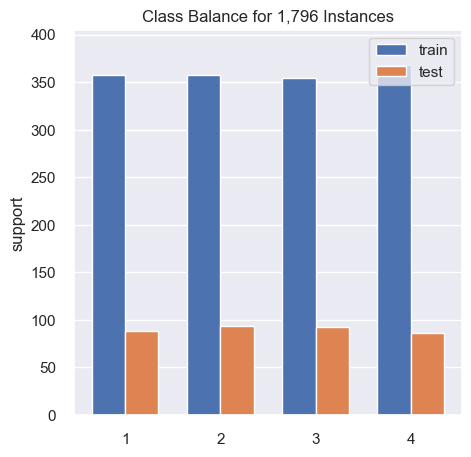

<AxesSubplot:title={'center':'Class Balance for 1,796 Instances'}, ylabel='support'>

In [1793]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[1, 2, 3, 4])
visualizer.fit(y_train, y_test)
visualizer.poof()

### My Model - Using SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
 


In [1794]:
train1= SVC(kernel='linear', C=2, decision_function_shape='ovo', gamma =0.1,random_state=1)
train1.fit(X_train, y_train)
joblib.dump(train1, "phone_testdata.pkl")

['phone_testdata.pkl']

In [1795]:
y_pred = train1.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, average= "micro")
recall= recall_score(y_test, y_pred, average= "micro")
print(accuracy, precision, recall)

0.9527777777777777 0.9527777777777777 0.9527777777777777


In [1796]:
cm = confusion_matrix(y_test,y_pred)
print(pd.DataFrame(cm))

    0   1   2   3
0  87   1   0   0
1   5  87   2   0
2   0   5  83   4
3   0   0   0  86


In [1797]:
clr = classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           1       0.95      0.99      0.97        88
           2       0.94      0.93      0.93        94
           3       0.98      0.90      0.94        92
           4       0.96      1.00      0.98        86

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



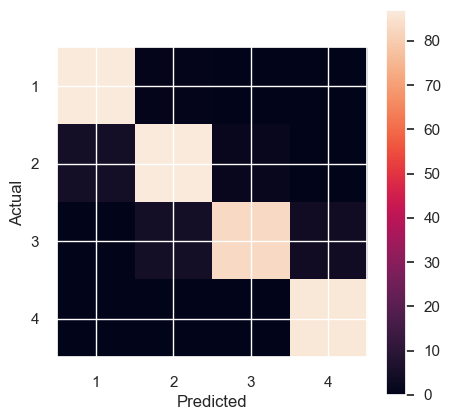

In [1798]:
#Plot Confusion Matrix
price_class = [1,2,3,4]
plt.imshow(cm, interpolation = 'nearest')
plt.colorbar()
tick_marks = np.arange(len(price_class))
plt.xticks(tick_marks, price_class)
plt.yticks(tick_marks, price_class)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

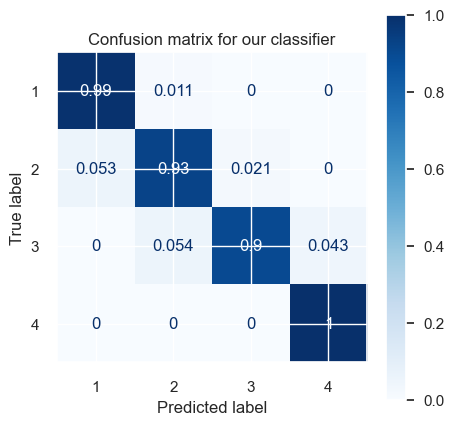

In [1799]:
matrix = plot_confusion_matrix(train1,  X_test, y_test, cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for our classifier')

plt.show(matrix)
plt.show()

### Data Validation of My Model (Using SVM)

In [1800]:
testdata = pd.read_csv('./clean_phone_testdata.csv')
testdata.shape

(200, 21)

In [1801]:
Y=testdata["price_range"].values
X= testdata.drop(['four_g','dual_sim','price_range'], axis= 1).to_numpy()
X = (X-np.min(X))/(np.max(X)-np.min(X)) #min-max scaler formulae, standardised the values so the value become smaller 
print(X.shape)

(200, 18)


In [1802]:
model = joblib.load("./phone_testdata.pkl")

In [1803]:
y_pred = model.predict(X)
print(y_pred[:40])
print(Y[:40])


[2 4 4 3 4 3 2 3 3 2 3 1 4 2 1 1 2 4 3 2 1 3 2 4 2 4 4 2 4 3 3 1 1 2 1 2 4
 1 2 3]
[2 4 4 3 4 3 2 3 3 2 3 1 4 3 1 1 2 4 3 2 1 3 2 4 2 4 4 2 4 3 3 1 2 2 1 2 4
 1 2 3]


In [1804]:
df = pd.DataFrame()
df['origin'] = y_test[:80]
df['predicted'] = y_pred[:80]

print(df)

    origin  predicted
0        1          2
1        2          4
2        4          4
3        4          3
4        4          4
..     ...        ...
75       2          2
76       1          1
77       3          1
78       1          1
79       2          3

[80 rows x 2 columns]


In [1805]:
pred_class = class_names[train1.predict(X[45].reshape(1,-1))[0] - 1]
actual_class = class_names[Y[45]-1]
pred_class, actual_class

('medium cost', 'medium cost')

### End of Training of Model

### Appendix

### Further Improvement of My SVM Model

#### Using Feature Selection & GridSearchCV

I try feature selection to reduce unnecessary features and see whether will affect the accuracy scores

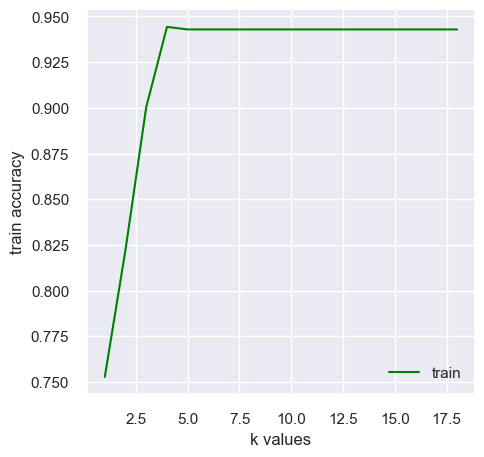

In [1806]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,19,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    train1.fit(x_new,y_train)
    accuracy_list_train.append(train1.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In the graph above, we can see 4 features gives the highest train accuracies.

In [1807]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("train accuracy:",df["train_score"].max())
print("accuracy feature:",df["train_score"].idxmax())

train accuracy: 0.9442896935933147
accuracy feature: 3


In [1808]:
print("accuracy values: \n", df.iloc[3])

accuracy values: 
 best features number    4.00000
train_score             0.94429
Name: 3, dtype: float64


In [1809]:
df.columns.values

array(['best features number', 'train_score'], dtype=object)

In [1810]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [1811]:
selector = SelectKBest(f_classif, k = 3)
x_new = selector.fit_transform(X_train, y_train)
x_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: [ 0 10 11]
x test features: [ 0 10 11]


In [1812]:
selector.get_feature_names_out()

array(['x0', 'x10', 'x11'], dtype=object)

I used GridSearchCV method to try to tune parameters for improvement of my SVM model

In [1813]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [1814]:
train1=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=train1,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9004355400696864
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


In [1815]:
train1=SVC(C=2,decision_function_shape="ovo",gamma=1,kernel="rbf")

In [1816]:
train1.fit(x_new,y_train)

SVC(C=2, decision_function_shape='ovo', gamma=1)

In [1817]:
print("train_accuracy:",train1.score(x_new,y_train))
Y_pred = train1.predict(x_new_test)
accuracy_score(y_test, Y_pred)
print("test accuracy:" ,accuracy_score(y_test, Y_pred))

train_accuracy: 0.9052924791086351
test accuracy: 0.7833333333333333


### Conclusion

After using Feature Selector & GridSearchCV, my model's accuracy is not improved but drop because of removing more than half of the features in the dataset and only kept the highest scoring features. Hence, I will stick with my initial model with 95% of accraucy. 